### Customer Segmentation Example 

This simple dataset consists of four columns; gender, age, annual income and spending scores of 200 individuals who randomly surveyed at a shopping mall. I am attempting to cluster them into groups based on the four variables. Here, principle component analysis (PCA) has been employed to visualize the clusters in a 2-D plot.   

The first step is to encode and scale the columns upon importing the dataset as follows. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.show()

dataset=pd.read_csv("Mall_Customers.csv")

dataset.drop('CustomerID',axis=1, inplace=True)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

sc=ColumnTransformer([
    ('num',StandardScaler(),['Age','Annual Income (k$)','Spending Score (1-100)']),
    ('cat',OneHotEncoder(),['Genre'])
])

dataset_new=sc.fit_transform(dataset)

Next, we use PCA to reduce four dimentions to two, which are linear combinations of original variables with different weigh factors (eigen vectors with eigen values). 

In [2]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_values=pca.fit_transform(dataset_new)


Next, we can use elbow method to optimal number of clusters (k) in a KMeans clustering algorithm. We vary the number of clusters from 1 to 10 in each iteration. 

C:\Users\ruksh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


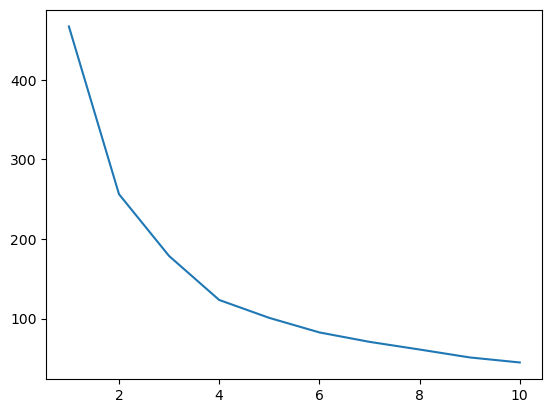

In [3]:
wscc=[]

from sklearn.cluster import KMeans

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(pca_values)
    wscc.append(kmeans.inertia_)

plt.plot(range(1,11),wscc)

Based on this visualization, we can see 4 clusters to segment our customers. 

Text(0, 0.5, 'PCA2')

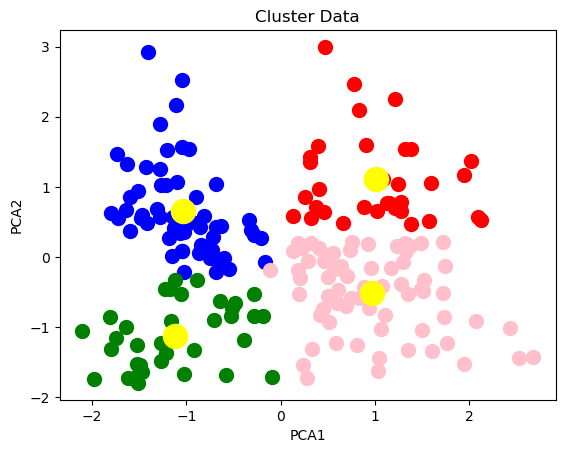

In [4]:
kmeans1=KMeans(n_clusters=4, init='k-means++', random_state=42)

kmeans1.fit(pca_values)
y_kmeans=kmeans1.predict(pca_values) # y=kmeans.fit_predict(x) . This is one step

#y_kmeans=y_kmeans.reshape(len(y_kmeans),1)
#dataset['cluster']=y_kmeans




#dataset[dataset['cluster']==0][['Annual Income (k$)'] n  Filtering

plt.scatter(pca_values[y_kmeans==0,0], pca_values[y_kmeans==0,1],s=100, c='red', label='Cluster 1' )
plt.scatter(pca_values[y_kmeans==1,0], pca_values[y_kmeans==1,1],s=100, c='blue', label='Cluster 2' )
plt.scatter(pca_values[y_kmeans==2,0], pca_values[y_kmeans==2,1],s=100, c='green', label='Cluster 3' )
plt.scatter(pca_values[y_kmeans==3,0], pca_values[y_kmeans==3,1],s=100, c='pink', label='Cluster 4' )

plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1], s=300, c='yellow')

plt.title("Cluster Data")
plt.xlabel("PCA1")
plt.ylabel("PCA2")



Finally, let's assign the respective cluster number to each customer in the original dataset. 

In [5]:
dataset['cluster']=kmeans1.fit_predict(pca_values)

In [6]:
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,2
